In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from scipy import stats

import sys
sys.path.append('../')
from utils.utils import calc_sparsity, is_outlier

In [2]:
path_data_folder = '../data/preprocessed/'
experiments = ["MGH66_P1_untreated.h5ad",
               "MGH66_P2_meropenem.h5ad",
               "MGH66_P3_ciprofloxacin.h5ad",
               "MGH66_P4_gentamicin.h5ad"]

In [3]:
adata_dict = dict()
for experiment in experiments:
    adata = sc.read_h5ad(filename=path_data_folder+experiment)
    adata_dict[experiment[6:-5]] = adata
adata_dict

{'P1_untreated': AnnData object with n_obs × n_vars = 410143 × 4066
     var: 'gene', 'long_protein_name', 'species', 'protein_name', 'rRNA',
 'P2_meropenem': AnnData object with n_obs × n_vars = 392941 × 3987
     var: 'gene', 'long_protein_name', 'species', 'protein_name', 'rRNA',
 'P3_ciprofloxacin': AnnData object with n_obs × n_vars = 390322 × 3391
     var: 'gene', 'long_protein_name', 'species', 'protein_name', 'rRNA',
 'P4_gentamicin': AnnData object with n_obs × n_vars = 326515 × 3439
     var: 'gene', 'long_protein_name', 'species', 'protein_name', 'rRNA'}

In [10]:
for adata in adata_dict.values:
    print(adata.shape)
    print("Sparsity:\t\t", calc_sparsity(adata.X.A))
    print("Mean counts per gene:\t", np.mean(np.sum(adata.X.A, axis=1)))
    print("Median counts per gene:\t", np.median(np.sum(adata.X.A, axis=1)))
    print("Mean genes per cell: \t", np.mean(np.sum(adata.X.A, axis=0)))
    print("Median genes per cell:\t", np.median(np.sum(adata.X.A, axis=0)))

(410143, 4066)
Sparsity:		 0.9980492107440664
Mean counts per gene:	 8.321548
Median counts per gene:	 6.0
Mean genes per cell: 	 839.40607
Median genes per cell:	 97.5
(392941, 3987)
Sparsity:		 0.9990803538145722
Mean counts per gene:	 3.7689755
Median counts per gene:	 3.0
Mean genes per cell: 	 371.45346
Median genes per cell:	 60.0
(390322, 3391)
Sparsity:		 0.999002842968761
Mean counts per gene:	 3.481413
Median counts per gene:	 3.0
Mean genes per cell: 	 400.72897
Median genes per cell:	 43.0
(410143, 4066)
Sparsity:		 0.9980492107440664
Mean counts per gene:	 8.321548
Median counts per gene:	 6.0
Mean genes per cell: 	 839.40607
Median genes per cell:	 97.5


Detected and removed 4550 (0.011%) outliers.
Detected and removed 7331 (0.019%) outliers.
Detected and removed 4953 (0.013%) outliers.
Detected and removed 1340 (0.004%) outliers.


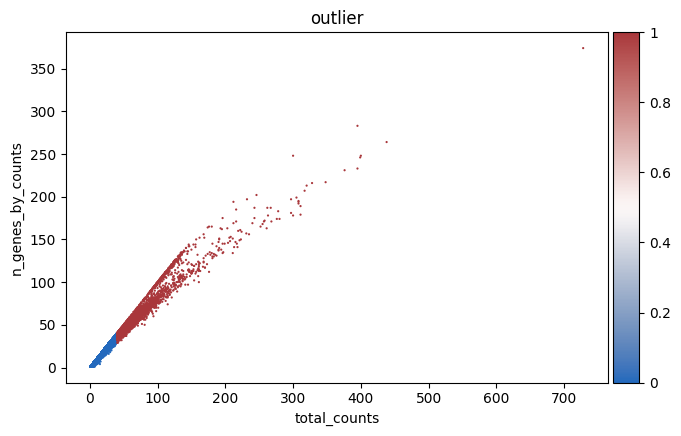

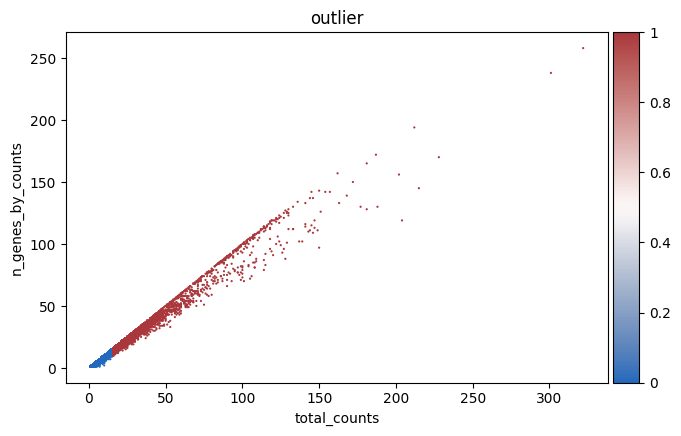

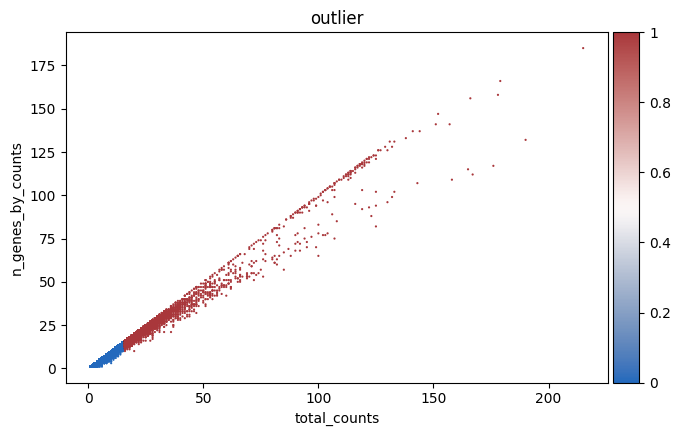

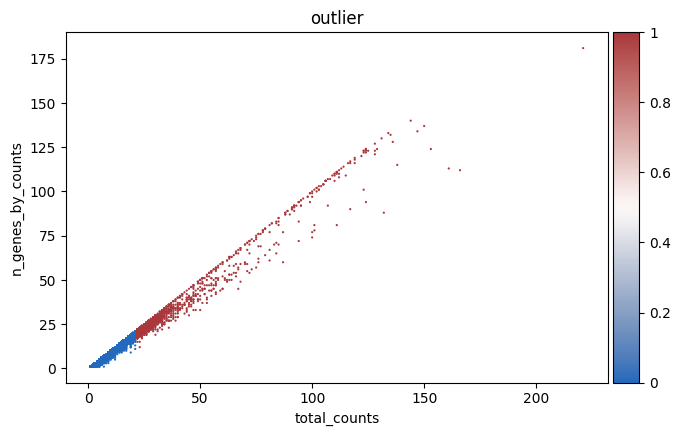

In [4]:
for key in adata_dict.keys():
    adata = adata_dict[key]
    sc.pp.calculate_qc_metrics(adata, var_type="genes", qc_vars=["rRNA"], percent_top=None, log1p=True, inplace=True)
    adata.obs["outlier"] = (is_outlier(adata, "log1p_total_counts", nmads=5) | 
                            is_outlier(adata, "log1p_n_genes_by_counts", nmads=5))
    adata_dict[key] = adata[~adata.obs["outlier"]].copy()
    print(f"Detected and removed {adata.obs.outlier.sum()} ({np.round(adata.obs.outlier.sum() / adata.shape[0], 3)}%) outliers.")
    sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color="outlier", show=False, size=10, color_map="vlag")

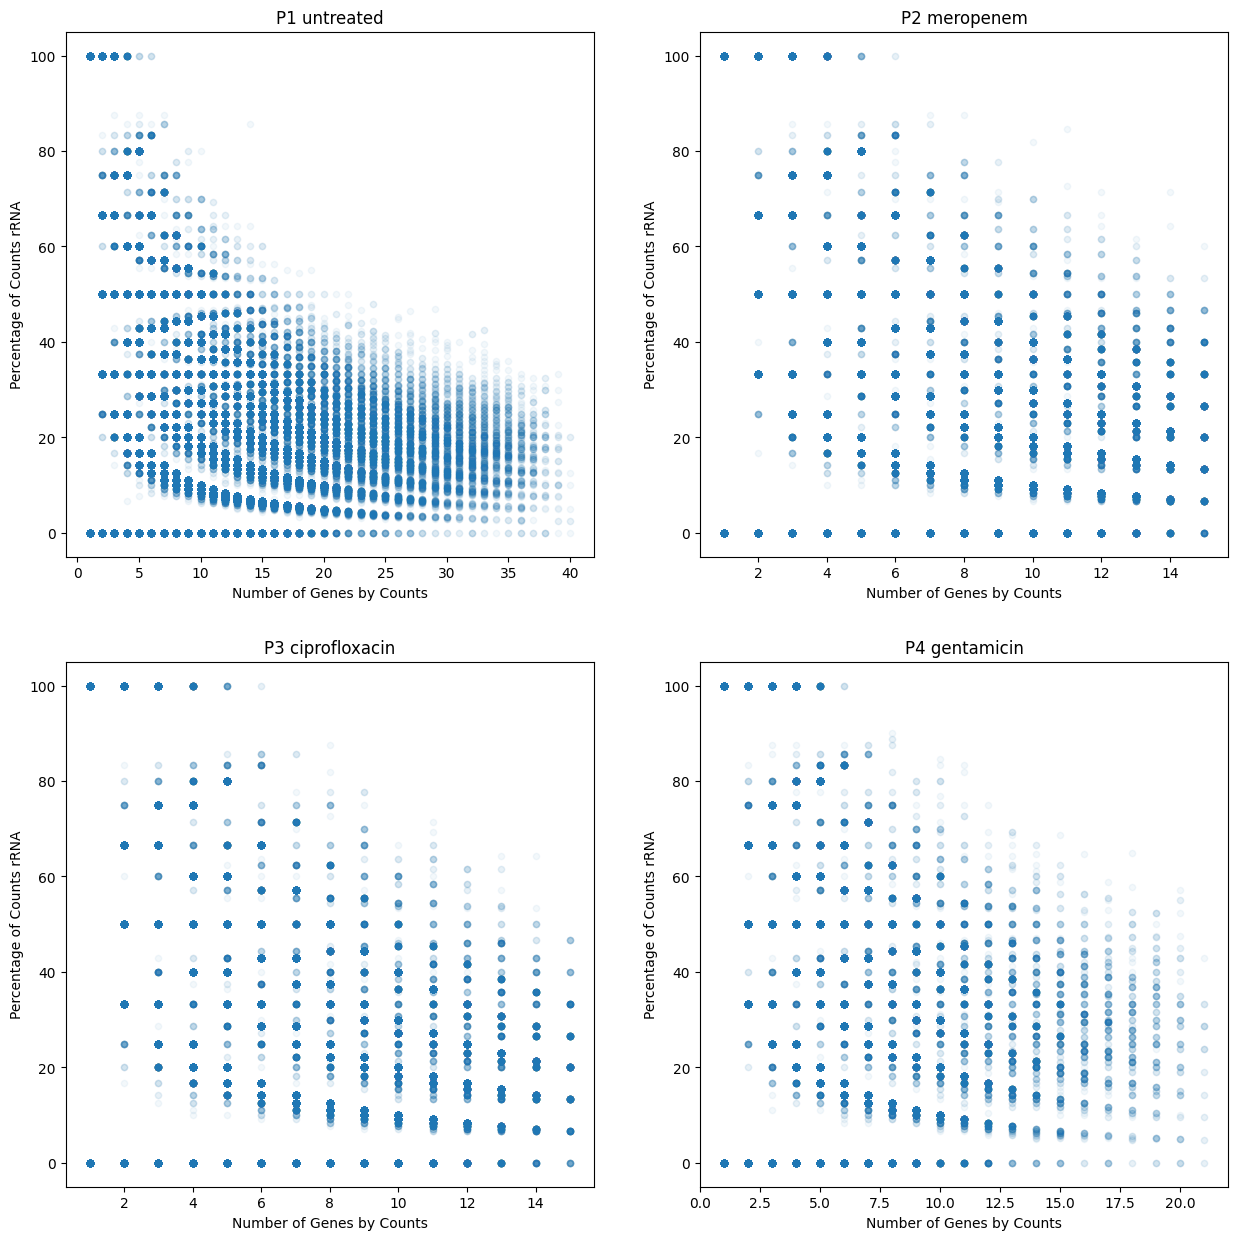

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes[0,0].scatter(adata_dict["P1_untreated"].obs["n_genes_by_counts"], adata_dict["P1_untreated"].obs["pct_counts_rRNA"], c='C0', s=20, alpha=0.05)
axes[0,0].set_xlabel("Number of Genes by Counts")
axes[0,0].set_ylabel("Percentage of Counts rRNA")
axes[0,0].set_title("P1 untreated")

axes[0,1].scatter(adata_dict["P2_meropenem"].obs["n_genes_by_counts"], adata_dict["P2_meropenem"].obs["pct_counts_rRNA"], c='C0', s=20, alpha=0.05)
axes[0,1].set_xlabel("Number of Genes by Counts")
axes[0,1].set_ylabel("Percentage of Counts rRNA")
axes[0,1].set_title("P2 meropenem")

axes[1,0].scatter(adata_dict["P3_ciprofloxacin"].obs["n_genes_by_counts"], adata_dict["P3_ciprofloxacin"].obs["pct_counts_rRNA"], c='C0', s=20, alpha=0.05)
axes[1,0].set_xlabel("Number of Genes by Counts")
axes[1,0].set_ylabel("Percentage of Counts rRNA")
axes[1,0].set_title("P3 ciprofloxacin")

axes[1,1].scatter(adata_dict["P4_gentamicin"].obs["n_genes_by_counts"], adata_dict["P4_gentamicin"].obs["pct_counts_rRNA"], c='C0', s=20, alpha=0.05)
axes[1,1].set_xlabel("Number of Genes by Counts")
axes[1,1].set_ylabel("Percentage of Counts rRNA")
axes[1,1].set_title("P4 gentamicin")

plt.show()

Text(0.5, 0.98, 'Count depth distribution')

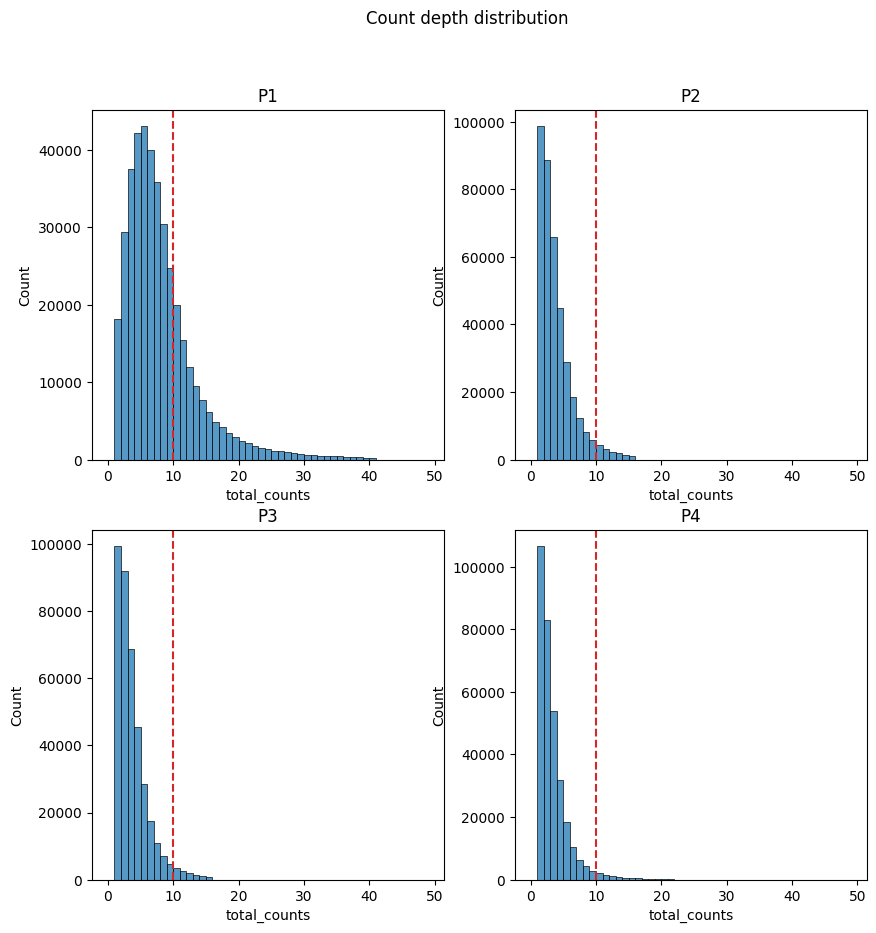

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

sns.histplot(adata_dict["P1_untreated"].obs["total_counts"], bins=np.arange(50), ax=axes[0, 0])
axes[0,0].axvline(x=10, color="C3", ls="--")
sns.histplot(adata_dict["P2_meropenem"].obs["total_counts"], bins=np.arange(50), ax=axes[0, 1])
axes[0,1].axvline(x=10, color="C3", ls="--")
sns.histplot(adata_dict["P3_ciprofloxacin"].obs["total_counts"], bins=np.arange(50), ax=axes[1, 0])
axes[1,0].axvline(x=10, color="C3", ls="--")
sns.histplot(adata_dict["P4_gentamicin"].obs["total_counts"], bins=np.arange(50), ax=axes[1, 1])
axes[1,1].axvline(x=10, color="C3", ls="--")

axes[0,0].set_title("P1")
axes[0,1].set_title("P2")
axes[1,0].set_title("P3")
axes[1,1].set_title("P4")
fig.suptitle("Count depth distribution")

In [8]:
for adata in adata_dict.values():
    print('Data shape before filtering:\t\t', adata.shape)
    sc.pp.filter_cells(adata, min_counts=10)
    sc.pp.filter_genes(adata, min_counts=1)
    sc.pp.filter_cells(adata, min_counts=1)
    print('Data shape after filtering:\t\t', adata.shape)
    print("--------------------------------------")

Data shape before filtering:		 (405593, 4066)
Data shape after filtering:		 (104250, 3858)
Data shape before filtering:		 (385610, 3987)
Data shape after filtering:		 (14113, 3329)
Data shape before filtering:		 (385369, 3391)
Data shape after filtering:		 (10935, 2570)
Data shape before filtering:		 (325175, 3439)
Data shape after filtering:		 (7979, 2648)


Text(0.5, 0.98, 'Gene count distribution')

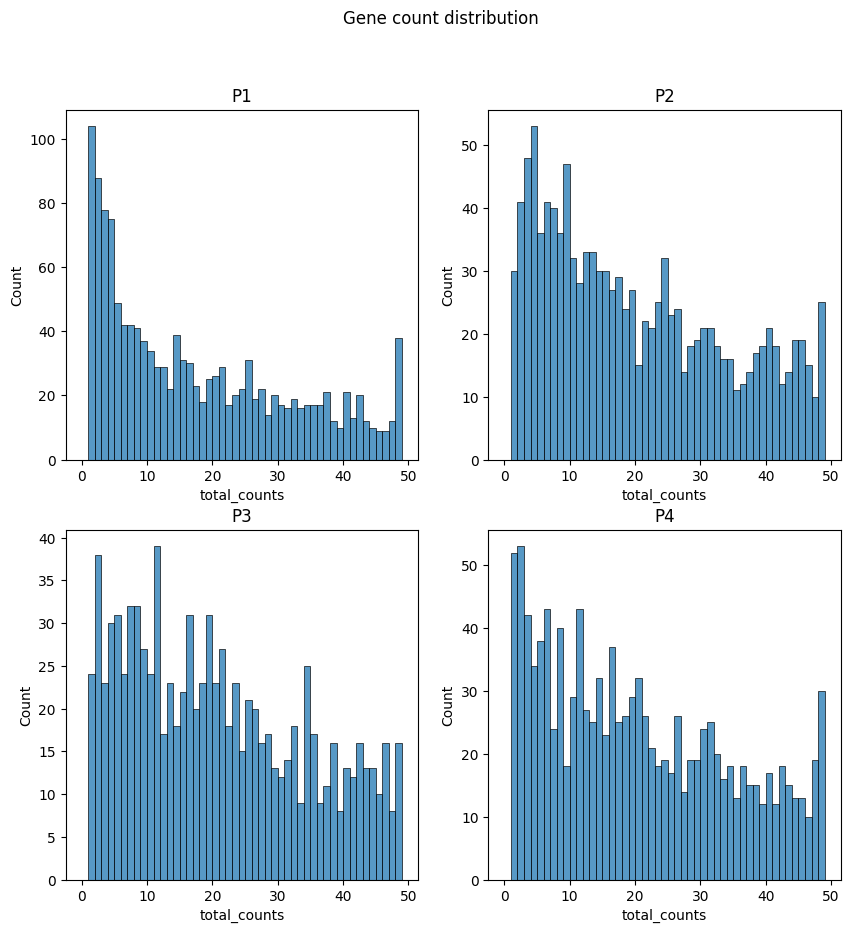

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

sns.histplot(adata_dict["P1_untreated"].var["total_counts"], bins=np.arange(50), ax=axes[0, 0])
sns.histplot(adata_dict["P2_meropenem"].var["total_counts"], bins=np.arange(50), ax=axes[0, 1])
sns.histplot(adata_dict["P3_ciprofloxacin"].var["total_counts"], bins=np.arange(50), ax=axes[1, 0])
sns.histplot(adata_dict["P4_gentamicin"].var["total_counts"], bins=np.arange(50), ax=axes[1, 1])

axes[0,0].set_title("P1")
axes[0,1].set_title("P2")
axes[1,0].set_title("P3")
axes[1,1].set_title("P4")
fig.suptitle("Gene count distribution")

In [18]:
print("Number of genes in P1 found in at least 5% of the cells: ", (1 - adata_dict["P1_untreated"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.05).sum())
print("Number of genes in P2 found in at least 5% of the cells: ", (1 - adata_dict["P2_meropenem"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.05).sum())
print("Number of genes in P3 found in at least 5% of the cells: ", (1 - adata_dict["P3_ciprofloxacin"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.05).sum())
print("Number of genes in P4 found in at least 5% of the cells: ", (1 - adata_dict["P4_gentamicin"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.05).sum())
print()
print("Number of genes in P1 found in at least 1% of the cells: ", (1 - adata_dict["P1_untreated"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.01).sum())
print("Number of genes in P2 found in at least 1% of the cells: ", (1 - adata_dict["P2_meropenem"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.01).sum())
print("Number of genes in P3 found in at least 1% of the cells: ", (1 - adata_dict["P3_ciprofloxacin"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.01).sum())
print("Number of genes in P4 found in at least 1% of the cells: ", (1 - adata_dict["P4_gentamicin"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.01).sum())
print()
print("Number of genes in P1 found in at least 0.5% of the cells: ", (1 - adata_dict["P1_untreated"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.005).sum())
print("Number of genes in P3 found in at least 0.5% of the cells: ", (1 - adata_dict["P3_ciprofloxacin"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.005).sum())
print("Number of genes in P2 found in at least 0.5% of the cells: ", (1 - adata_dict["P2_meropenem"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.005).sum())
print("Number of genes in P4 found in at least 0.5% of the cells: ", (1 - adata_dict["P4_gentamicin"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.005).sum())
print()
print("Number of genes in P1 found in at least 0.1% of the cells: ", (1 - adata_dict["P1_untreated"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.001).sum())
print("Number of genes in P3 found in at least 0.1% of the cells: ", (1 - adata_dict["P3_ciprofloxacin"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.001).sum())
print("Number of genes in P2 found in at least 0.1% of the cells: ", (1 - adata_dict["P2_meropenem"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.001).sum())
print("Number of genes in P4 found in at least 0.1% of the cells: ", (1 - adata_dict["P4_gentamicin"].var["pct_dropout_by_counts"].sort_values().values / 100 > 0.001).sum())

Number of genes in P1 found in at least 5% of the cells:  19
Number of genes in P2 found in at least 5% of the cells:  4
Number of genes in P3 found in at least 5% of the cells:  3
Number of genes in P4 found in at least 5% of the cells:  4

Number of genes in P1 found in at least 1% of the cells:  159
Number of genes in P2 found in at least 1% of the cells:  68
Number of genes in P3 found in at least 1% of the cells:  81
Number of genes in P4 found in at least 1% of the cells:  59

Number of genes in P1 found in at least 0.5% of the cells:  279
Number of genes in P3 found in at least 0.5% of the cells:  134
Number of genes in P2 found in at least 0.5% of the cells:  125
Number of genes in P4 found in at least 0.5% of the cells:  102

Number of genes in P1 found in at least 0.1% of the cells:  1014
Number of genes in P3 found in at least 0.1% of the cells:  474
Number of genes in P2 found in at least 0.1% of the cells:  601
Number of genes in P4 found in at least 0.1% of the cells:  42

In [27]:
for adata in adata_dict.values():

    adata.var["gc5"] = adata.var.pct_dropout_by_counts <= 95
    adata.var["gc1"] = adata.var.pct_dropout_by_counts <= 99
    adata.var["gc0.5"] = adata.var.pct_dropout_by_counts <= 99.5
    adata.var["gc0.1"] = adata.var.pct_dropout_by_counts <= 99.9

AnnData object with n_obs × n_vars = 104250 × 3858
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_rRNA', 'log1p_total_counts_rRNA', 'pct_counts_rRNA', 'outlier', 'n_counts'
    var: 'gene', 'long_protein_name', 'species', 'protein_name', 'rRNA', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'gc5', 'gc1', 'gc0.5', 'gc0.1'
    layers: 'raw_counts', 'sqrt_counts'
AnnData object with n_obs × n_vars = 14113 × 3329
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_rRNA', 'log1p_total_counts_rRNA', 'pct_counts_rRNA', 'outlier', 'n_counts'
    var: 'gene', 'long_protein_name', 'species', 'protein_name', 'rRNA', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'gc5', 'gc1', 'gc0.5', 'gc0.1'
    layers: 'raw_co

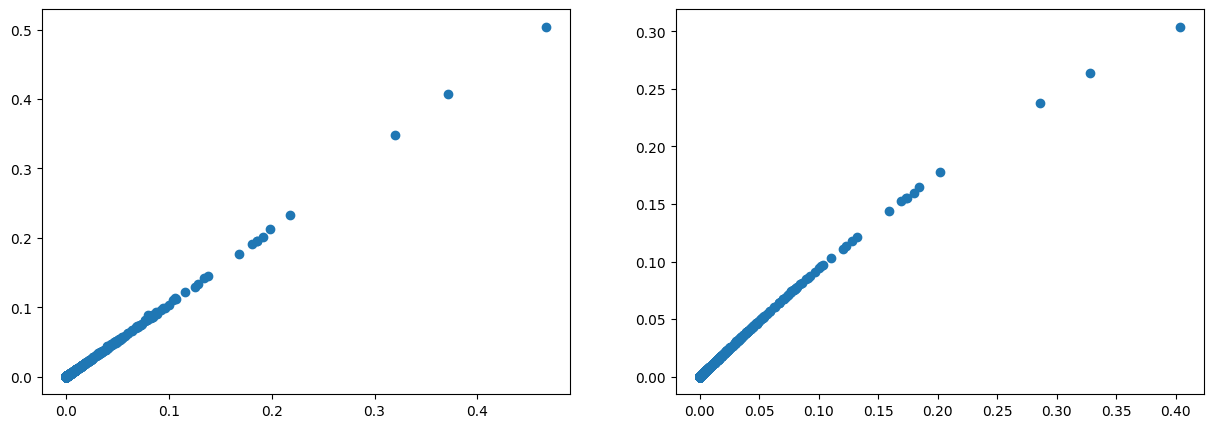

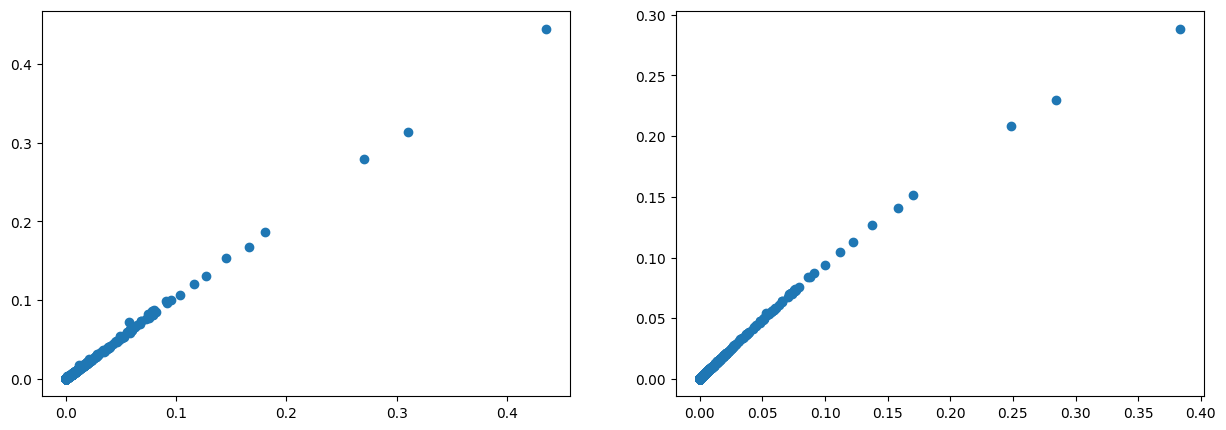

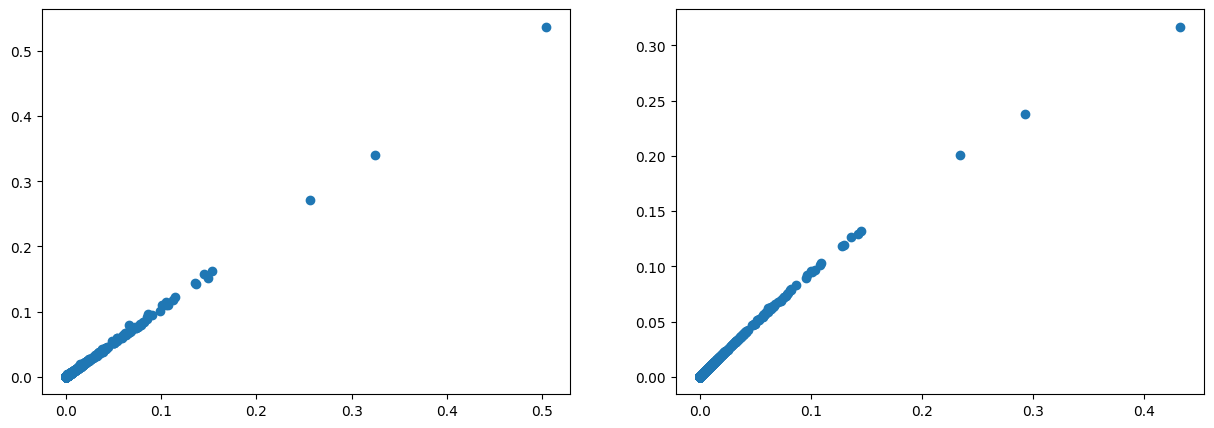

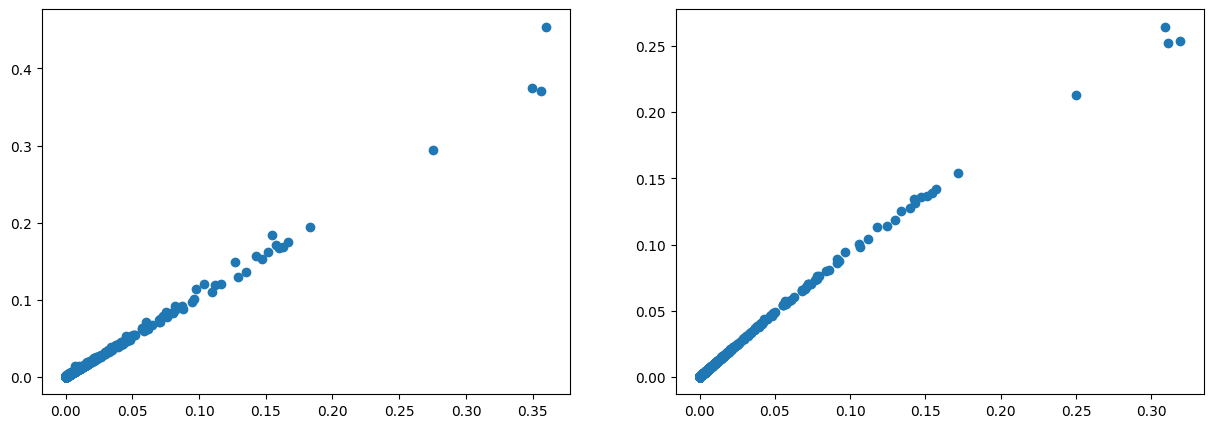

In [38]:
for adata in adata_dict.values():
    adata.layers["raw_counts"]  = adata.X
    adata.layers["sqrt_counts"] = np.sqrt(adata.X)
    print(adata)
    fig, axes = plt.subplots(1, 2, figsize=(15,5))

    axes[0].scatter(x=np.mean(adata.X.A, axis=0), y=np.var(adata.X.A, axis=0), color="C0", label="gc5 genes")
    axes[1].scatter(x=np.mean(adata.layers['sqrt_counts'].A, axis=0), y=np.var(adata.layers['sqrt_counts'].A, axis=0), color="C0")

In [40]:
for key in adata_dict.keys():
    sc.write(adata=adata_dict[key], filename=f'../data/preprocessed/MGH66_{key}_preprocessed.h5ad')